<h1>Importing Libraries</h1>

In [44]:
"""
Code borrowed from: https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial
Dataset borrowed from: https://www.kaggle.com/oddrationale/mnist-in-csv
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("C:/Books/Texas State Books/MNIST"))

['mnist_test.csv', 'mnist_test.csv.zip', 'mnist_train.csv', 'mnist_train.csv.zip']


In [45]:
# read train 
train = pd.read_csv("C:/Books/Texas State Books/MNIST/mnist_train.csv")
print(train.shape)
train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# read test 
test= pd.read_csv("C:/Books/Texas State Books/MNIST/mnist_test.csv")
print(test.shape)
test.head()

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)

# put labels into y_test variable
Y_test = test["label"]
# Drop 'label' column
X_test = test.drop(labels = ["label"],axis = 1)

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

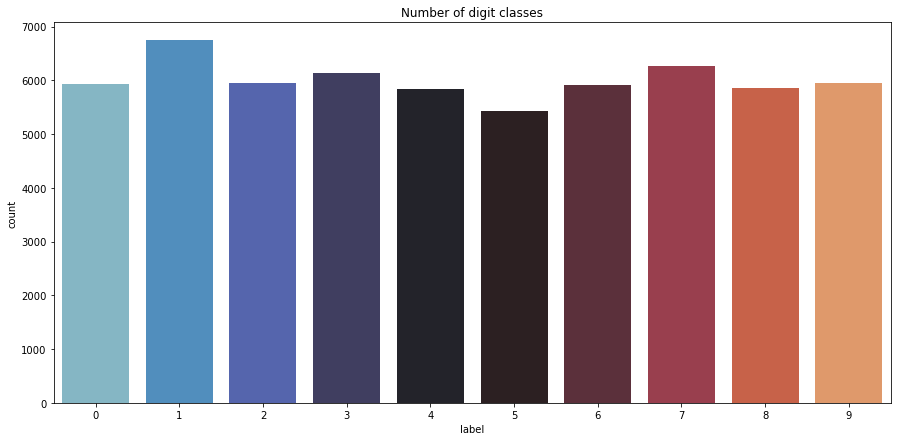

In [48]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

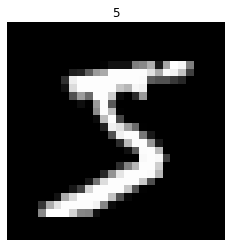

In [49]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

<h1>Normalization, Reshaping and Label Encoding</h1>

In [50]:
"""
Normalization
    We perform a grayscale normalization to reduce the effect of illumination's differences.
    If we perform normalization, CNN works faster.
Reshape
    Train and test images (28 x 28)
    We reshape all data to 28x28x1 3D matrices.
    Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
Label Encoding
    Encode labels to one hot vectors
    2 => [0,0,1,0,0,0,0,0,0,0]
    4 => [0,0,0,0,1,0,0,0,0,0]
"""

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (60000, 784)
x_test shape:  (10000, 784)


In [51]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


In [52]:
# Label Encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

In [53]:
# Reserve 10% of training data for validation
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

x_train shape (54000, 28, 28, 1)
x_val shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_val shape (6000, 10)


In [54]:
"""
Convolution Operation:
We have some images(28*28) and feature detector(3*3)
Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
Feature detector = kernel = filter
Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
feature map = conv(input image, feature detector). Element wise multiplication of matrices.
feature map = convolved feature
Stride = navigating in input image.
We reduce the size of image. This is important bc code runs faster. However, we lost information.
We create multiple feature maps bc we use multiple feature detectors(filters).
"""

'\nConvolution Operation:\nWe have some images(28*28) and feature detector(3*3)\nFeature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.\nFeature detector = kernel = filter\nFeauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.\nfeature map = conv(input image, feature detector). Element wise multiplication of matrices.\nfeature map = convolved feature\nStride = navigating in input image.\nWe reduce the size of image. This is important bc code runs faster. However, we lost information.\nWe create multiple feature maps bc we use multiple feature detectors(filters).\n'

<h1>Building the Model</h1>

In [55]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [56]:
# Define the optimizer
adam_optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [57]:
# Compile the model
model.compile(optimizer = adam_optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [58]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [59]:
"""
Data Augmentation is used to increase the training examples and tackle overfitting.
"""

# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [60]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

  ...
    to  
  ['...']
Train for 216 steps, validate on 6000 samples
Epoch 1/10
216/216 [==============================] - 41s 190ms/step - loss: 0.9548 - accuracy: 0.6839 - val_loss: 0.1723 - val_accuracy: 0.9522
Epoch 2/10
216/216 [==============================] - 40s 184ms/step - loss: 0.3555 - accuracy: 0.8884 - val_loss: 0.1074 - val_accuracy: 0.9682
Epoch 3/10
216/216 [==============================] - 41s 192ms/step - loss: 0.2680 - accuracy: 0.9162 - val_loss: 0.0888 - val_accuracy: 0.9732
Epoch 4/10
216/216 [==============================] - 40s 185ms/step - loss: 0.2335 - accuracy: 0.9271 - val_loss: 0.0745 - val_accuracy: 0.9783
Epoch 5/10
216/216 [==============================] - 40s 184ms/step - loss: 0.2061 - accuracy: 0.9376 - val_loss: 0.0692 - val_accuracy: 0.9803
Epoch 6/10
216/216 [==============================] - 41s 188ms/step - loss: 0.1927 - accuracy: 0.9415 - val_loss: 0.0625 - val_accuracy: 0.9808
Epoch 7/10
216/216 [==============================] - 41s 1